In [291]:
from __future__ import print_function
import requests
import numpy as np
import pprint
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
from matplotlib import dates
from matplotlib.pyplot import figure
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from dateutil.parser import parse
import locale

In [292]:
locale.setlocale(locale.LC_ALL, 'en_US')

'en_US'

In [222]:
url_countries = "https://api.covid19api.com/countries"

In [223]:
countries = requests.get(url_countries)

In [224]:
countries.status_code

200

In [225]:
countries = countries.json()
#countries

In [226]:
country_slug_list = []
country_list = []

In [227]:
for country in countries:
    country_slug_list.append(country['Slug'])

In [228]:
for country in countries:
    country_list.append(country['Country'])

In [229]:
country_slug_list.sort()
country_list.sort()

In [230]:
#country_slug_list

In [231]:
dropdown_country = widgets.Dropdown(
    options=(country_slug_list),
#     value='Country',
    description='Country:',
    disabled=False,
)

    
# dropdown_country.observe(dropdown_country_eventhandler, names='value')
display(dropdown_country)

# def dropdown_country_eventhandler(change):
#     print(dropdown_country.value)

Dropdown(description='Country:', options=('afghanistan', 'ala-aland-islands', 'albania', 'algeria', 'american-…

In [261]:
country_name = dropdown_country.value

In [262]:
country_name

'russia'

In [263]:
#country_name = "india"

In [264]:
url_complete_status = f"https://api.covid19api.com/total/dayone/country/{country_name}"

In [265]:
stats_since_day_one = requests.get(url_complete_status)

In [266]:
stats_since_day_one = stats_since_day_one.json()

In [267]:
#pprint.pprint(stats_since_day_one)

In [268]:
# country_name = stats_since_day_one[0]['Country']
# country_name

In [269]:
active_list = []
confirmed_list =[]
deaths_list = []
recovered_list = []
date_list = []
new_date_list = []
# lat = []
# lon =[]

In [270]:
for stat in stats_since_day_one:
    active_list.append(stat['Active'])
    confirmed_list.append(stat['Confirmed'])
    deaths_list.append(stat['Deaths'])
    recovered_list.append(stat['Recovered'])
    date_list.append(stat['Date'])
    
    

In [271]:
for date in date_list:
    new_date_list.append(date[:10])

In [272]:
#new_date_list

In [273]:
date_objects = [datetime.strptime(date, '%Y-%m-%d').date() for date in new_date_list]

In [274]:
#date_objects

In [275]:
# def y_label(argument):
#     switcher = {
#         active_list : ax.set_ylabel('Active Cases'),
#         confirmed_list: ax.set_ylabel('Confirmed Cases'),
#         deaths_list: ax.set_ylabel('Deaths'),
#         recovered_list: ax.set_ylabel('Recovered'),
#     }
#     print(switcher.get(argument, "No plot available"))

In [276]:
total_confirmed_cases = confirmed_list[-1]
total_active_cases = active_list[-1]
total_deaths = deaths_list[-1]
total_recovered = recovered_list[-1]
percent_active = round(total_active_cases/total_confirmed_cases*100,2)
percent_death = round(total_deaths/total_confirmed_cases*100,2)
percent_recovered = round(total_recovered/total_confirmed_cases*100,2)

In [277]:
country_name_capitalized = country_name.capitalize()
def yLabelTitle(ax,y):
    if y == confirmed_list:
        ax.set_ylabel('Confirmed Cases')
        ax.set_title(f"COVID-19 Confirmed Cases in {country_name_capitalized}\n Total Confirmed Cases - {total_confirmed_cases}")
    elif y == active_list:
        ax.set_ylabel('Active Cases')
        ax.set_title(f"COVID-19 Active Cases in {country_name_capitalized}\n Total Active Cases - {total_active_cases}")
    elif y == deaths_list:
        ax.set_ylabel('Total Deaths')
        ax.set_title(f"COVID-19 Deaths in {country_name_capitalized}\n Total Deaths - {total_deaths}")
    elif y == recovered_list:
        ax.set_ylabel('Total Recovered')
        ax.set_title(f"COVID-19 Recovered in {country_name_capitalized}\n Total Recovered - {total_recovered}")
    else:
        print("No Plot To Show")
        
        
        
        

Text(0.5, 0, 'Date')

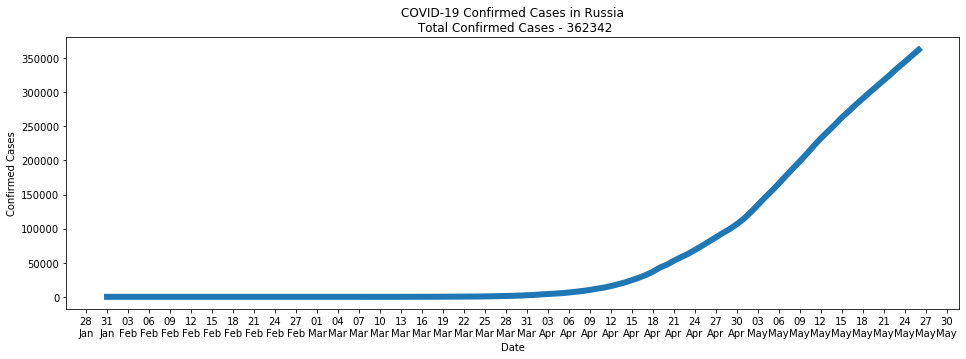

In [278]:
x = date_objects
y = confirmed_list
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(x,y,linewidth=6.0)
myFmt = dates.DateFormatter('%d\n%b')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(dates.DayLocator(interval=3))
yLabelTitle(ax,y)
ax.set_xlabel("Date")
#ax.set_xlabel =  
#plt.plot(date_objects,confirmed_list)
# plt.set_xticks(date_objects)
# plt.set_xticklabels(date_objects, rotation='vertical', fontsize=10)

Text(0.5, 0, 'Date')

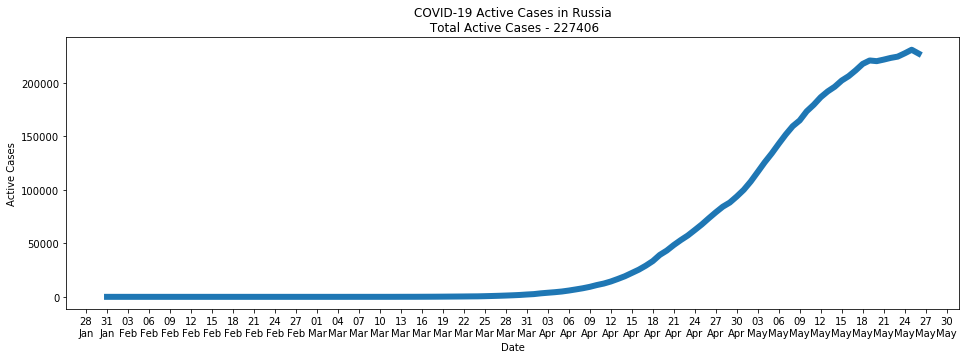

In [279]:
x = date_objects
y = active_list
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(x,y,linewidth=6.0)
myFmt = dates.DateFormatter('%d\n%b')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(dates.DayLocator(interval=3))
yLabelTitle(ax,y)
ax.set_xlabel("Date")

Text(0.5, 0, 'Date')

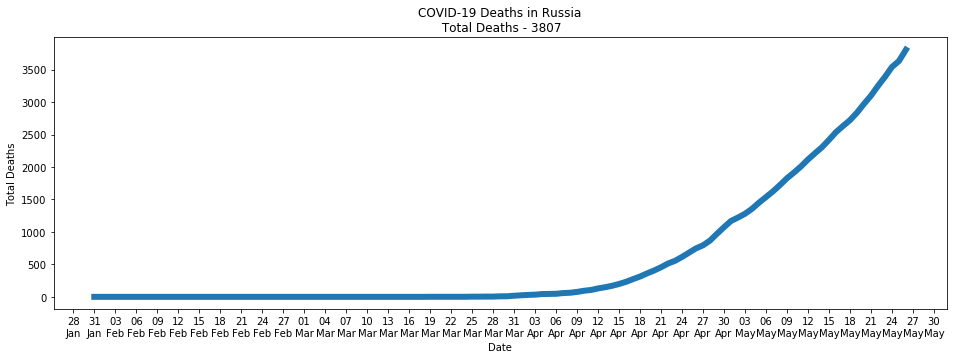

In [280]:
x = date_objects
y = deaths_list
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(x,y,linewidth=6.0)
myFmt = dates.DateFormatter('%d\n%b')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(dates.DayLocator(interval=3))
yLabelTitle(ax,y)
ax.set_xlabel("Date")

Text(0.5, 0, 'Date')

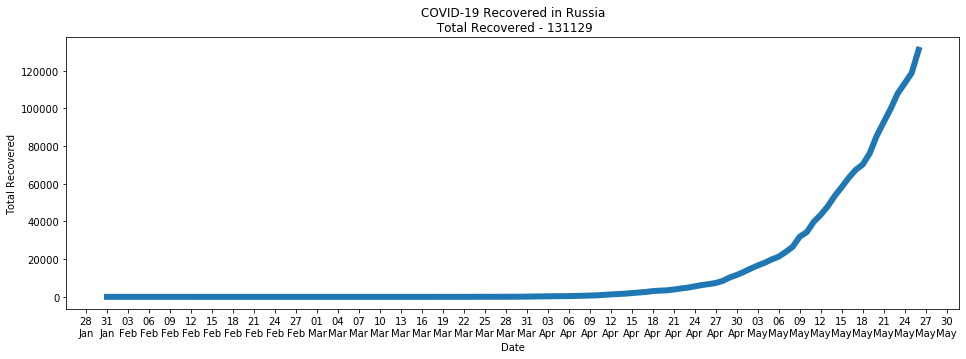

In [281]:
x = date_objects
y = recovered_list
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(x,y,linewidth=6.0)
myFmt = dates.DateFormatter('%d\n%b')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(dates.DayLocator(interval=3))
yLabelTitle(ax,y)
ax.set_xlabel("Date")

In [282]:
avg_cases_per_day = round(total_confirmed_cases/days_since_first_case)
avg_deaths_per_day = round(total_deaths/days_since_first_case)
avg_recoveries_per_day = round(total_recovered/days_since_first_case)

In [283]:
first_case_reported = new_date_list[0]

In [284]:
date_list_calculate = [datetime.strptime(dateInDatetime, '%Y-%m-%d') for dateInDatetime in new_date_list]

In [285]:
date_first_case = date_list_calculate[0]
current_date = datetime.now()
days_since_first_case = (current_date - date_first_case).days
days_since_first_case


117

In [286]:
# total_confirmed_cases = confirmed_list[-1]
# total_active_cases = active_list[-1]
# total_deaths = deaths_list[-1]
# total_recovered = recovered_list[-1]
# percent_active = round(total_active_cases/total_confirmed_cases*100,2)
# percent_death = round(total_deaths/total_confirmed_cases*100,2)
# percent_recovered = round(total_recovered/total_confirmed_cases*100,2)

In [287]:
date_before_14_days = current_date - timedelta(days=14)
#date_before_14_days
year = date_before_14_days.strftime("%Y")
month = date_before_14_days.strftime("%m")
day = date_before_14_days.strftime("%d")


date_before_14_days_string = f"{year}-{month}-{day}"
date_before_14_days_string

index_before_14_days = new_date_list.index("2020-05-13")
#total_index = len(new_date_list) 


In [288]:
# i = index_before_14_days
# confirmed_cases_14_days = 0
# active_cases_14_days = 0
# deaths_14_days = 0
# recovered_14_days = 0
# while i<total_index:
#     confirmed_cases_14_days += confirmed_list[i]
#     active_cases_14_days += active_list[i]
#     deaths_14_days += deaths_list[i]
#     recovered_14_days += recovered_list[i]
#     i = i+1
confirmed_cases_14_days = total_confirmed_cases - confirmed_list[index_before_14_days]
active_cases_14_days = total_active_cases - active_list[index_before_14_days]
deaths_14_days = total_deaths - deaths_list[index_before_14_days]
recovered_14_days = total_recovered - recovered_list[index_before_14_days]
avg_cases_per_day_14_days = round(confirmed_cases_14_days/14)
avg_deaths_per_day_14_days = round(deaths_14_days/14)
avg_recoveries_per_day_14_days = round(recovered_14_days/14)

AttributeError: 'function' object has no attribute 'string'

In [296]:
print(f"Statistics for {country_name_capitalized}")
print(f"Total Confirmed Cases : {total_confirmed_cases:n}")
print(f"Total Active Cases : {total_active_cases:n}")
print(f"Total Deaths : {total_deaths:n}")
print(f"Total Recovered : {total_recovered:n}")
print(f"Active Percentage : {percent_active:n}%")
print(f"Death Percentage : {percent_death}%")
print(f"Recovery Percentage : {percent_recovered}%")
print(f"First Case Reported : {first_case_reported}")
print(f"Days since First Case : {days_since_first_case}")
print(f"Average Cases Per Day : {avg_cases_per_day:n}")
print(f"Average Deaths Per Day : {avg_deaths_per_day:n}")
print(f"Average Recoveries Per Day : {avg_recoveries_per_day:n}")
print("\n")
print(f"Statistics for {country_name_capitalized} For Last 14 days (2 weeks)")
print(f"Confirmed Cases : {confirmed_cases_14_days:n}")
print(f"Active Cases : {active_cases_14_days:n}")
print(f"Deaths : {deaths_14_days:n}")
print(f"Recovered : {recovered_14_days:n}")
print(f"Average Cases Per Day : {avg_cases_per_day_14_days:n}")
print(f"Average Deaths Per Day : {avg_deaths_per_day_14_days:n}")
print(f"Average Recoveries Per Day : {avg_recoveries_per_day_14_days:n}")



Statistics for Russia
Total Confirmed Cases : 362,342
Total Active Cases : 227,406
Total Deaths : 3,807
Total Recovered : 131,129
Active Percentage : 62.76%
Death Percentage : 1.05%
Recovery Percentage : 36.19%
First Case Reported : 2020-01-31
Days since First Case : 117
Average Cases Per Day : 3,071
Average Deaths Per Day : 32
Average Recoveries Per Day : 1,111


Statistics for Russia For Last 14 days (2 weeks)
Confirmed Cases : 120,071
Active Cases : 35,350
Deaths : 1,595
Recovered : 83,126
Average Cases Per Day : 8,576
Average Deaths Per Day : 114
Average Recoveries Per Day : 5,938
